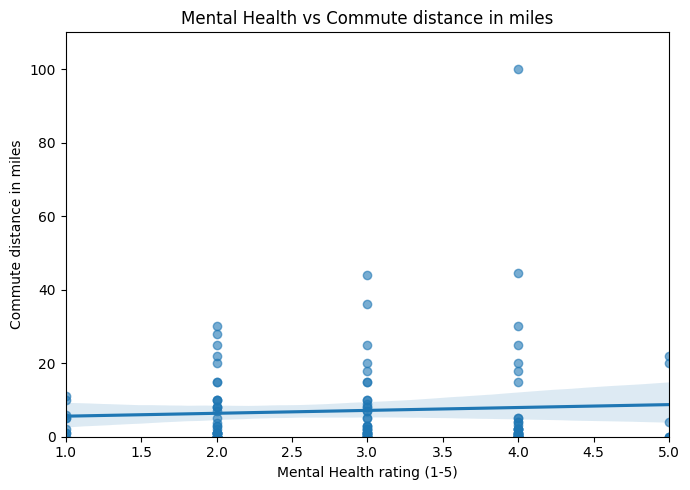

In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("responses.csv")

Caffeine_mg  = [col for col in df.columns if "caffeine" in col.lower()]
Campus_Meals = [col for col in df.columns if "substantial" in col.lower()]
Diet_Rating  = [col for col in df.columns if "diet" in col.lower()]

if Caffeine_mg:  df.rename(columns={Caffeine_mg[0]: 'Caffeine_mg'}, inplace=True)
if Campus_Meals: df.rename(columns={Campus_Meals[0]: 'Campus_Meals'}, inplace=True)
if Diet_Rating:  df.rename(columns={Diet_Rating[0]: 'Diet_Rating'}, inplace=True)

for col in ['Caffeine_mg', 'Campus_Meals', 'Diet_Rating']: df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.dropna(subset=['Caffeine_mg', 'Campus_Meals', 'Diet_Rating'])

# Scatter plot graphing
plt.figure(figsize=(10,6))
plt.scatter(df['Caffeine_mg'], df['Campus_Meals'], alpha=0.7, color='blue')

# Linear regression line -- shows that there is negative correlation between the two.
slope, intercept = np.polyfit(df['Caffeine_mg'], df['Campus_Meals'], 1)
x_vals = np.array([df['Caffeine_mg'].min(), df['Caffeine_mg'].max()])
y_vals = slope * x_vals + intercept
plt.plot(x_vals, y_vals, color='red', linewidth=2, label='Regression line')

# ---- Create scatter + regression line ----
plt.figure(figsize=(7, 5))
sns.regplot(
    data=plot_df,
    x="mental_health",
    y="commute_distance",
    scatter_kws={"alpha": 0.6}
)

# ---- Titles and labels ----
plt.title("Mental Health vs Commute distance in miles")
plt.xlabel("Mental Health rating (1-5)")
plt.ylabel("Commute distance in miles")

# ---- Nice bounds (Like on x is usually 1–5) ----
plt.xlim(1,5)
plt.ylim(bottom = 0, top = 110)

plt.tight_layout()
plt.show()

### caffiene intake vs IS

/var/folders/_2/3lrnsn7x5615sf09xw7cfcfm0000gn/T/ipykernel_77785/1771480343.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


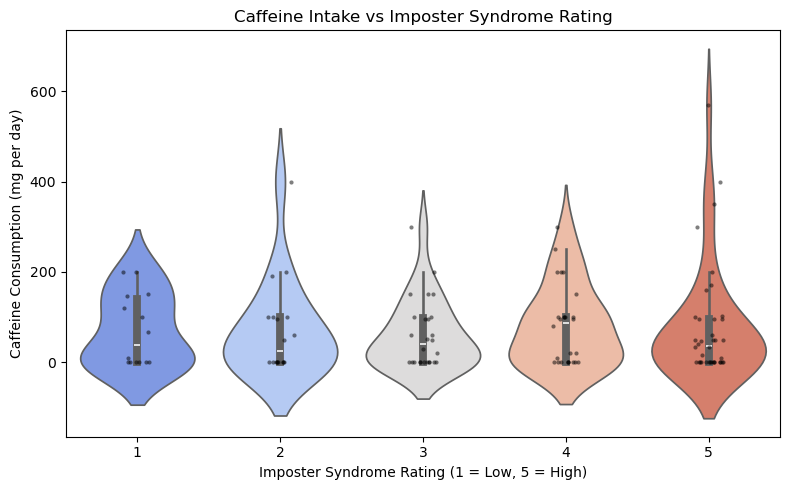

In [ ]:
caff_col_clean = 'caffeine_mg'  # new numeric column

# Clean the caffeine data
# Copy column and strip spaces
caff = df[caff_col].astype(str).str.strip().copy()

# Cleaning function
def clean_caffeine(x):
    if pd.isna(x) or x.lower() in ['n/a', 'na']:
        return np.nan
    # Case 1: contains 'mg'
    if 'mg' in x.lower():
        try:
            return float(x.lower().replace('mg','').strip())
        except:
            return np.nan
    # Case 2: range like "95-300"
    if '-' in x:
        try:
            parts = x.split('-')
            nums = [float(p.strip()) for p in parts]
            return np.mean(nums)  # take the average of the range
        except:
            return np.nan
    # Case 3: just a number
    try:
        return float(x)
    except:
        return np.nan

# Apply cleaning
df[caff_col_clean] = caff.apply(clean_caffeine)

# Optional: inspect cleaned data
# print(df[caff_col_clean].describe())
# print(np.sort(df[caff_col_clean].dropna().unique()))

# ------------------------------
# 3️⃣ Prepare data for plotting
# ------------------------------
df_plot = df[[is_col, caff_col_clean]].dropna().copy()
df_plot[is_col] = df_plot[is_col].astype(int).astype(str)  # treat IS rating as categorical

# ------------------------------
# 4️⃣ Create violin plot
# ------------------------------
plt.figure(figsize=(8, 5))
sns.violinplot(
    data=df_plot,
    x=is_col,
    y=caff_col_clean,
    palette="coolwarm",
    inner="box",
    order=is_order 
)

# Optional: add individual participant points
sns.stripplot(
    data=df_plot,
    x=is_col,
    y=caff_col_clean,
    color='k',
    alpha=0.5,
    jitter=True,
    size=3
)

# Labels and title
plt.title("Caffeine Intake vs Imposter Syndrome Rating")
plt.xlabel("Imposter Syndrome Rating (1 = Low, 5 = High)")
plt.ylabel("Caffeine Consumption (mg per day)")
plt.tight_layout()
plt.show()
